In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Adding the Target Variable

In [2]:
df = pd.read_csv('D://Take Home Challenge//2//Relax Challenge//1481069814_relax_challenge//relax_challenge//takehome_users.csv',encoding='cp1252')
user_engagement = pd.read_csv('D://Take Home Challenge//2//Relax Challenge//1481069814_relax_challenge//relax_challenge//takehome_user_engagement.csv',encoding='cp1252',parse_dates=['time_stamp'])

In [3]:
# if I don't put parse date when importing the file, I use this code:
#df['time_stamp'] = pd.to_datetime(df['time_stamp'])
#df['time_stamp'] = df['time_stamp'].dt.floor('d').astype(np.int64)

In [4]:
# dropping duplicates
user_engagement = user_engagement.sort_values(['user_id', 'time_stamp']).drop_duplicates()
# checking 3 time_stamp window for each user
user_engagement['wk'] = user_engagement['time_stamp'].dt.week
user_engagement = user_engagement.groupby(['wk','user_id'])['time_stamp'].count().reset_index(name="freq")
# calculating the number of days for each 3 logs window
result = user_engagement[user_engagement.freq >= 3]
# getting the list of user_ids
user_ids_list = result.user_id.tolist()

In [5]:
# Adding "adopted_user" variable
def adopted_user(x):
    if x.object_id in user_ids_list:
        return True
    else:
        return False
df['adopted_user'] = df.apply(adopted_user, axis = 1)

In [6]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


### Data Cleaning

In [7]:
# Checking the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted_user                  12000 non-null bool
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 949.3+ KB


In [8]:
df.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


### Data Visualization

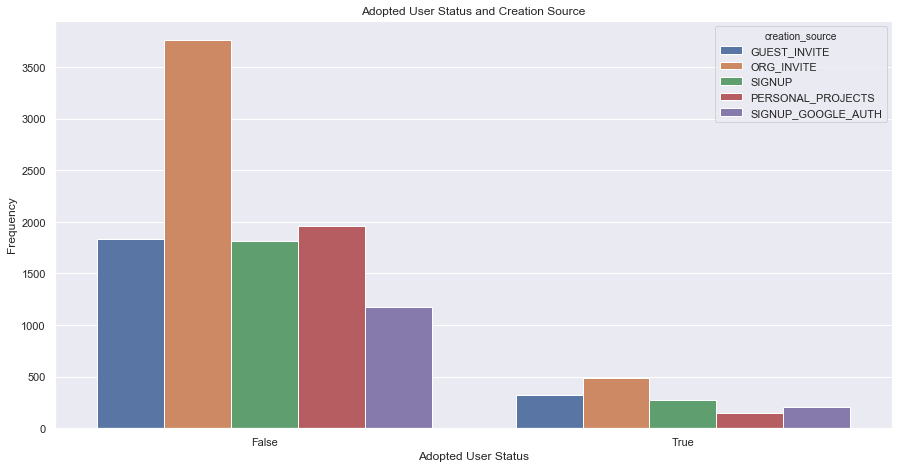

In [9]:
sns.set(style="darkgrid")
plt.subplots(figsize=(15,7.5))
sns.countplot(x="adopted_user", hue="creation_source", data=df)
plt.title('Adopted User Status and Creation Source')
plt.xlabel('Adopted User Status')
plt.ylabel('Frequency')
plt.show()

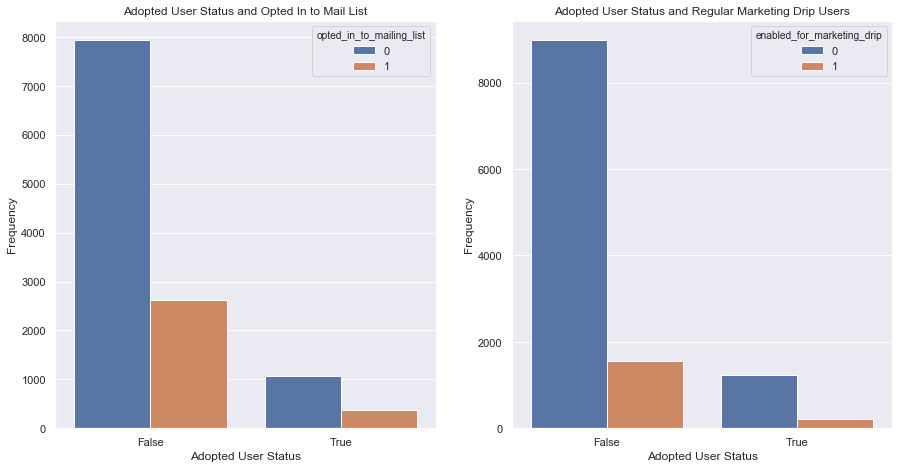

In [10]:
sns.set(style="darkgrid")
plt.subplots(figsize=(15,7.5))
plt.subplot(1,2,1)
sns.countplot(x="adopted_user", hue="opted_in_to_mailing_list", data=df)
plt.title('Adopted User Status and Opted In to Mail List')
plt.xlabel('Adopted User Status')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
sns.countplot(x="adopted_user", hue="enabled_for_marketing_drip", data=df)
plt.title('Adopted User Status and Regular Marketing Drip Users')
plt.xlabel('Adopted User Status')
plt.ylabel('Frequency')
plt.show()

C:\Users\farad\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\farad\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


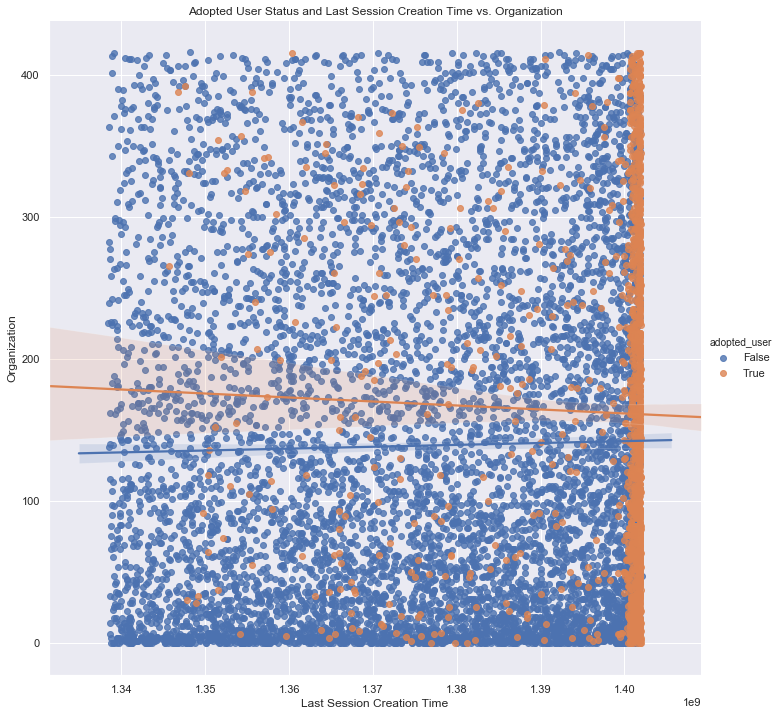

In [11]:
sns.lmplot(x='last_session_creation_time', y='org_id',data=df,hue='adopted_user',size=10)
plt.title('Adopted User Status and Last Session Creation Time vs. Organization')
plt.xlabel('Last Session Creation Time')
plt.ylabel('Organization')
plt.show()

C:\Users\farad\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


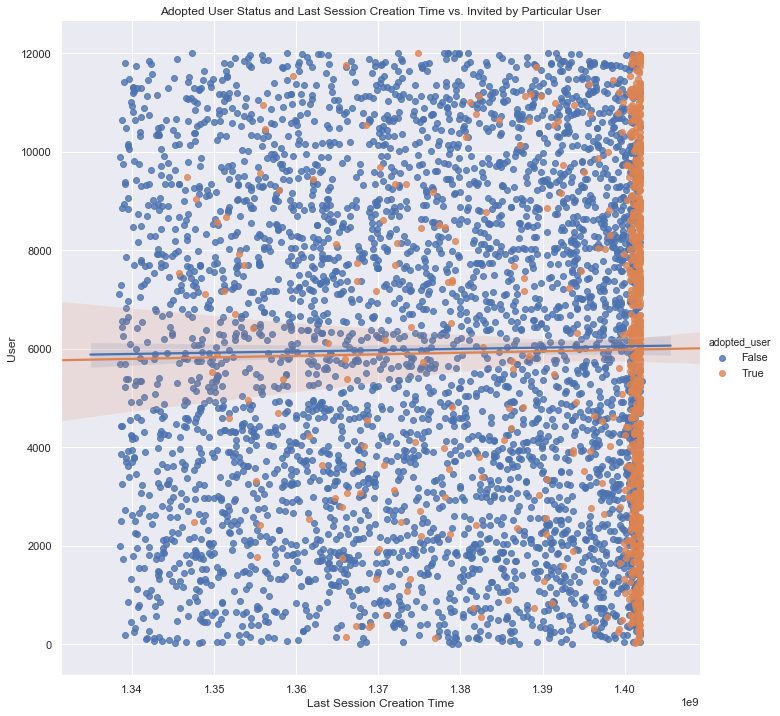

In [12]:
sns.lmplot(x='last_session_creation_time', y='invited_by_user_id',data=df,hue='adopted_user',size=10)
plt.title('Adopted User Status and Last Session Creation Time vs. Invited by Particular User')
plt.xlabel('Last Session Creation Time')
plt.ylabel('User')
plt.show()

### ConClusion

In order to determine the most important features to predict adopted users, I created the adopted user parameter first, and then, I did data visualization of the features (that makes sense to have impact) against the target parameter. as you see in the df, adopted_user (as target parameter) has 2 values which are True or False. it determines if a user logged in 3 days a week or not. 

First, we compare the values of target parameter with creation source. the proportion of each one the sources are similar to the values of the target parameter. but we can say that in general, it has impact on determining target value. sign-ups through website have the highest impact on the adopted users.

Also, those users who opted in the mail lists and also, regular marketing drip users have the impacts which their proportion is almost same in each group.

Finally, the last 2 figures show that the most impact on target variable is by last session creation time, but organization and invitation by particular user has no effect on target value. if the last session of an user is more closer to now, there will be more chance which the user is an adopted one. this is regardless of the user organization or the invitation of another user.

Based on what I said, I can prioritize the features in the table below:

Feature | Rank 
:---|:---
last_session_creation_time | 1
opted_in_to_mailing_list | 2
enabled_for_marketing_drip | 3
creation_source | 4

And also, creation date can be another parameter that can have impact on target variable. but I don't see any logic so I didn't analyze it further. but it can be added to analysis as well.

### Further Research

As the further research, we can apply some machine learning techniques (to be specific supervised learning techniques) to get some results and we can play with input variables untill we minimize the error or improve any other measurement variables. this can give us even better ideas about input variables.